In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import sys
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(threshold=sys.maxsize)

%matplotlib inline 

In [27]:
train_values = pd.read_csv('data/train_values.csv', index_col='building_id')
train_values.sort_index(inplace=True)
train_labels = pd.read_csv('data/train_labels.csv', index_col='building_id')
train_labels.sort_index(inplace=True)

print('train dataset:',train_values.shape, train_labels.shape)

train dataset: (260601, 38) (260601, 1)


In [28]:
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,30,266,1224,1,25,5,2,t,r,n,f,j,s,d,0,1,0,0,0,0,0,0,0,0,0,v,0,0,0,0,0,0,0,0,0,0,0,0
8,17,409,12182,2,0,13,7,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
12,17,716,7056,2,5,12,6,o,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
16,4,651,105,2,80,5,4,n,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
17,3,1387,3909,5,40,5,10,t,r,n,f,q,o,d,0,0,0,0,1,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
train_labels.head()

,damage_grade
building_id,
4,2
8,3
12,3
16,2
17,2


## Clean data

In [30]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 4 to 1052934
Data columns (total 38 columns):
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non-null object
plan_configuration                        260601 n

In [57]:
#Outliners
outliners_floors_idx = train_values[train_values['count_floors_pre_eq']>=4].index
train_values.drop(labels=outliners_floors_idx, inplace=True)
train_labels.drop(labels=outliners_floors_idx, inplace=True)

train_values.shape , train_labels.shape

((252215, 38), (252215, 1))

In [58]:
numeric_columns_check = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 
                         'count_floors_pre_eq', 'age', 'area_percentage' ,'height_percentage', 'count_families']

for col in numeric_columns_check:
    series_desc = train_values.describe()[col]
    iqr = series_desc['75%']-series_desc['25%']
    outliner_min = series_desc['25%']-(iqr*2)
    outliner_max = series_desc['75%']+(iqr*2)
    print(col, train_values[train_values[col]<outliner_min].shape[0] + train_values[train_values[col]>outliner_max].shape[0])


geo_level_1_id 0
geo_level_2_id 0
geo_level_3_id 0
count_floors_pre_eq 95830
age 6030
area_percentage 7588
height_percentage 466
count_families 32903


In [59]:
train_values.groupby(['count_floors_pre_eq']).count().geo_level_1_id

count_floors_pre_eq
1     40404
2    156385
3     55426
Name: geo_level_1_id, dtype: int64

((260351, 38), (260351, 1))

## Encode

In [60]:
df_enc = pd.get_dummies(train_values)
df_enc.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,30,266,1224,1,25,5,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8,17,409,12182,2,0,13,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
12,17,716,7056,2,5,12,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
16,4,651,105,2,80,5,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
25,26,1132,6645,2,0,6,6,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


## SMOTE

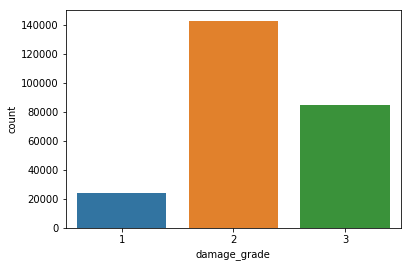

In [61]:
sns.countplot(data=train_labels, x='damage_grade')

In [62]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=42, k_neighbors=5)
x_oversampled, y_oversampled = os.fit_resample(df_enc, train_labels['damage_grade'])

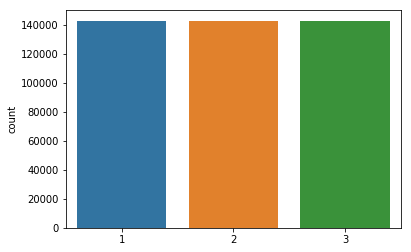

In [63]:
sns.countplot(x=y_oversampled)

# Model

In [64]:
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [65]:
pipe = make_pipeline(
    MinMaxScaler(), 
    PowerTransformer(standardize=False), 
    xgb.XGBClassifier(objective='multi:softmax', num_class=3, reg_lambda=0.8, )
)
pipe

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('powertransformer', PowerTransformer(copy=True, method='yeo-johnson', standardize=False)), ('xgbclassifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, ga...      reg_lambda=0.8, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])

In [ ]:
param_grid={
    'xgbclassifier__base_score': [0.55],
     'xgbclassifier__colsample_bytree': [0.8],
     'xgbclassifier__max_depth': [12],
     'xgbclassifier__min_child_weight': [1],
     'xgbclassifier__n_estimators': [1000],
     'xgbclassifier__subsample': [0.8]
}
gs = GridSearchCV(pipe, param_grid, cv=3, n_jobs=3, verbose=4)
gs.fit(x_oversampled, y_oversampled)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


In [82]:
gs.best_params_

{'xgbclassifier__base_score': 0.55,
 'xgbclassifier__colsample_bytree': 0.8,
 'xgbclassifier__max_depth': 12,
 'xgbclassifier__min_child_weight': 1,
 'xgbclassifier__n_estimators': 1000,
 'xgbclassifier__subsample': 0.8}

In [78]:
gs.best_score_

0.8135216232662568

# Prediction

In [83]:
test_values = pd.read_csv('data/test_values.csv', index_col='building_id')

In [84]:
test_values.groupby(by=['count_floors_pre_eq']).count()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count_floors_pre_eq,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264,13264
2,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406,52406
3,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554,18554
4,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762,1762
5,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793,793
6,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
7,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
8,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
test_enc = pd.get_dummies(test_values)
predictions = gs.predict(test_enc)

In [ ]:
submission_format = pd.read_csv('data/submission_format.csv', index_col='building_id')
my_submission = pd.DataFrame(data=predictions,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.head()

In [ ]:
my_submission.to_csv('submission-v4-blog2.csv')

In [ ]:
!head submission-v4-blog2.csv